# Lead Scoring Case Study

## Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#!jt -r
import warnings 
warnings.filterwarnings("ignore")

## 1. Reading the data

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Renaming variabes
lists = {"What matters most to you in choosing a course":"Choosing_Course","What is your current occupation" : "Occupation",
         "Receive More Updates About Our Courses" : "Updates_On_Course","Total Time Spent on Website":"Time_Spent",
         "Update me on Supply Chain Content":"Updates_On_Supplychain",
         "I agree to pay the amount through cheque" : "Cheque_Payment",
         "A free copy of Mastering The Interview" : "Free_Copy","Get updates on DM Content": "DM_Content_Updates",}
df= df.rename(columns=lists)
df.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         9240 non-null   object 
 1   Lead Number                         9240 non-null   int64  
 2   Lead Origin                         9240 non-null   object 
 3   Lead Source                         9204 non-null   object 
 4   Do Not Email                        9240 non-null   object 
 5   Do Not Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   TotalVisits                         9103 non-null   float64
 8   Time_Spent                          9240 non-null   int64  
 9   Page Views Per Visit                9103 non-null   float64
 10  Last Activity                       9137 non-null   object 
 11  Country                             6779 no

## 2. EDA

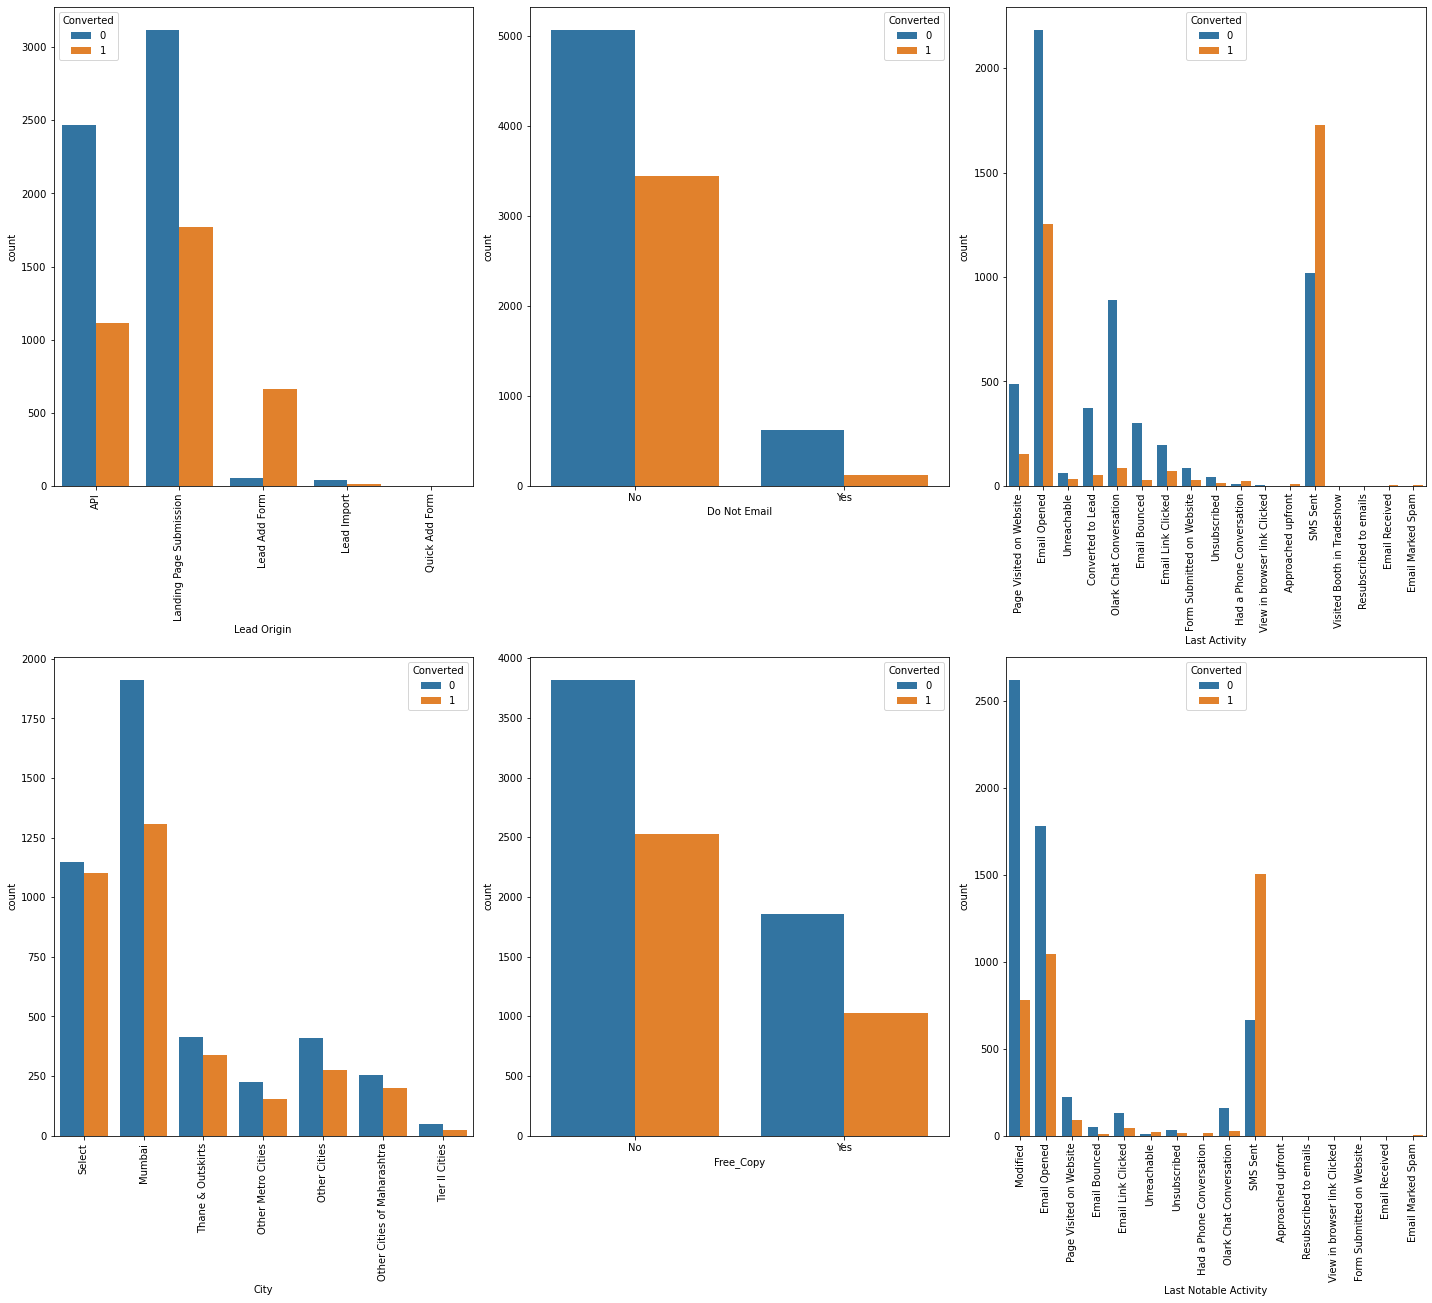

In [7]:
plt.figure(figsize = (20,25))

plt.subplot(331)
sns.countplot(x='Lead Origin', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.tight_layout()

plt.subplot(332)
sns.countplot(x='Do Not Email', hue='Converted', data= df).tick_params(axis='x')
plt.tight_layout()

plt.subplot(333)
sns.countplot(x='Last Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.tight_layout()

plt.subplot(334)
sns.countplot(x='City', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.tight_layout()

plt.subplot(335)
sns.countplot(x='Free_Copy', hue='Converted', data= df).tick_params(axis='x')
plt.tight_layout()

plt.subplot(336)
sns.countplot(x='Last Notable Activity', hue='Converted', data= df).tick_params(axis='x', rotation = 90)
plt.tight_layout()

plt.show()

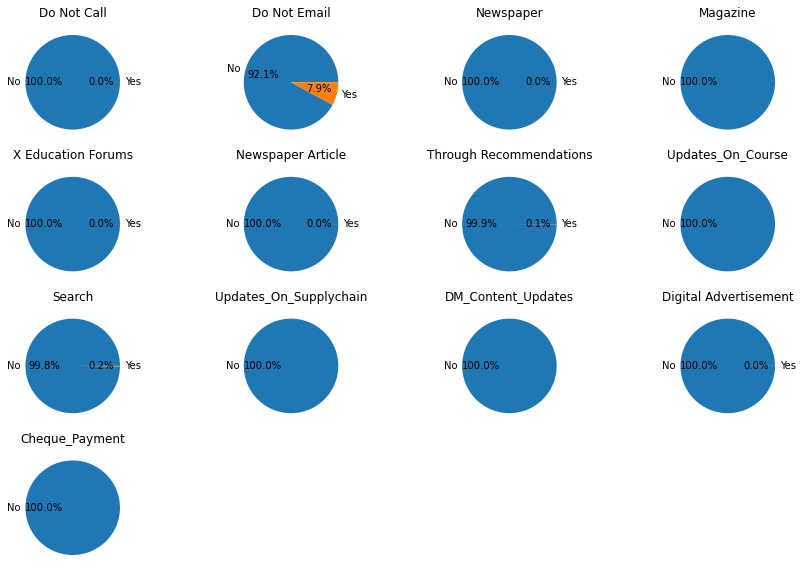

In [8]:

plt.figure(figsize=(15,10))
plt.subplot(441)
a=df["Do Not Call"].value_counts()
plt.title("Do Not Call")
plt.pie(a,autopct='%1.1f%%',labels=a.index)
#plt.xticks(rotation=90)

plt.subplot(442)
b = df["Do Not Email"].value_counts()
plt.title("Do Not Email")
plt.pie(b,autopct='%1.1f%%',labels=b.index)
plt.xticks(rotation=90)

plt.subplot(443)
c = df["Newspaper"].value_counts()
plt.title("Newspaper")
plt.pie(c,autopct='%1.1f%%',labels=c.index)
plt.xticks(rotation=90)

plt.subplot(444)
d = df["Magazine"].value_counts() 
plt.title("Magazine")
plt.pie(d,autopct='%1.1f%%',labels=d.index)
plt.xticks(rotation=90)

plt.subplot(445)
e = df["X Education Forums"].value_counts()
plt.title("X Education Forums")
plt.pie(e,autopct='%1.1f%%',labels=e.index)
# plt.tight_layout()
plt.xticks(rotation=90)

plt.subplot(446)
f = df["Newspaper Article"].value_counts() 
plt.title("Newspaper Article")
plt.pie(f,autopct='%1.1f%%',labels=f.index)
plt.xticks(rotation=90)

plt.subplot(447)
g = df["Through Recommendations"].value_counts() 
plt.title("Through Recommendations")
plt.pie(g,autopct='%1.1f%%',labels=g.index)
plt.xticks(rotation=90)

plt.subplot(448)
h = df["Updates_On_Course"].value_counts() 
plt.title("Updates_On_Course")
plt.pie(h,autopct='%1.1f%%',labels=h.index)
plt.xticks(rotation=90)

plt.subplot(449)
i = df["Search"].value_counts() 
plt.title("Search")
plt.pie(i,autopct='%1.1f%%',labels=i.index)
plt.xticks(rotation=90)

plt.subplot(4,4,10)
j = df["Updates_On_Supplychain"].value_counts() 
plt.title("Updates_On_Supplychain")
plt.pie(j,autopct='%1.1f%%',labels=j.index)
plt.xticks(rotation=90)

plt.subplot(4,4,11)
k = df["DM_Content_Updates"].value_counts() 
plt.title("DM_Content_Updates")
plt.pie(k,autopct='%1.1f%%',labels=k.index)
plt.xticks(rotation=90)
 
plt.subplot(4,4,12)
l = df["Digital Advertisement"].value_counts() 
plt.title("Digital Advertisement")
plt.pie(l,autopct='%1.1f%%',labels=l.index)
plt.xticks(rotation=90)

plt.subplot(4,4,13)
m = df["Cheque_Payment"].value_counts() 
plt.title("Cheque_Payment")
plt.pie(m,autopct='%1.1f%%',labels=m.index)
plt.xticks(rotation=90)

# plt.subplot(4,4,14)
# n = df["Choosing_Course"].value_counts() 
# plt.title("Choosing_Course")
# plt.pie(n,autopct='%1.1f%%',labels=m.index)
# plt.xticks(rotation=90)
plt.show()

Here we can see the data is biased to one values

In [9]:
# Dropping few variables which are having only NO values which are not important
df.drop(["Magazine", "Updates_On_Course", "Updates_On_Supplychain","DM_Content_Updates", 
         "Cheque_Payment"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         9240 non-null   object 
 1   Lead Number                         9240 non-null   int64  
 2   Lead Origin                         9240 non-null   object 
 3   Lead Source                         9204 non-null   object 
 4   Do Not Email                        9240 non-null   object 
 5   Do Not Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   TotalVisits                         9103 non-null   float64
 8   Time_Spent                          9240 non-null   int64  
 9   Page Views Per Visit                9103 non-null   float64
 10  Last Activity                       9137 non-null   object 
 11  Country                             6779 no

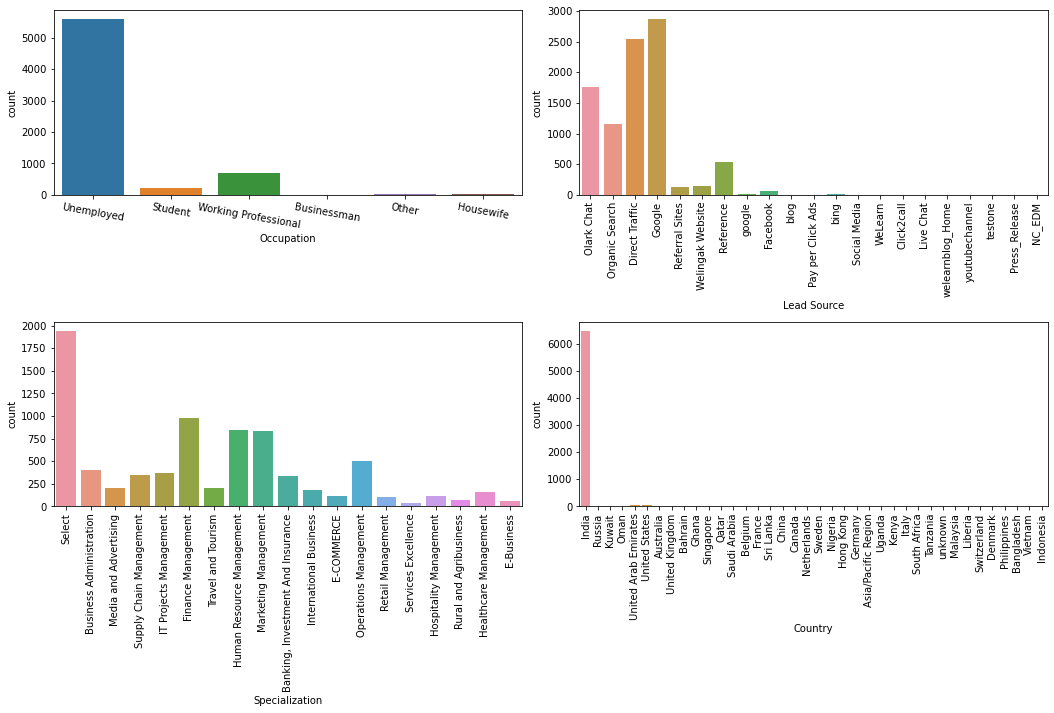

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(df["Occupation"])
plt.xticks(rotation=350)

plt.subplot(222)
sns.countplot(df["Lead Source"])
plt.xticks(rotation=90)
plt.tight_layout()

plt.subplot(223)
sns.countplot(df["Specialization"])
plt.tight_layout()
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(df["Country"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [11]:
# In the above charts, we can observe that the Spcialization column and Country column has highest "Select" values 
#which represents NaN as mentioned in data dictionery. Hence dropping that column
print("Specialization")
print()
print(df["Specialization"].value_counts())
print("--------------------------------------------------")
print("Country")
print()
print(df["Country"].value_counts())

Specialization

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64
--------------------------------------------------
Country

India                   6492
United States             69
United Arab Emirates      53
Sing

In [12]:
df.drop(["Specialization","Country"], inplace=True,axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Prospect ID                         9240 non-null   object 
 1   Lead Number                         9240 non-null   int64  
 2   Lead Origin                         9240 non-null   object 
 3   Lead Source                         9204 non-null   object 
 4   Do Not Email                        9240 non-null   object 
 5   Do Not Call                         9240 non-null   object 
 6   Converted                           9240 non-null   int64  
 7   TotalVisits                         9103 non-null   float64
 8   Time_Spent                          9240 non-null   int64  
 9   Page Views Per Visit                9103 non-null   float64
 10  Last Activity                       9137 non-null   object 
 11  How did you hear about X Education  7033 no

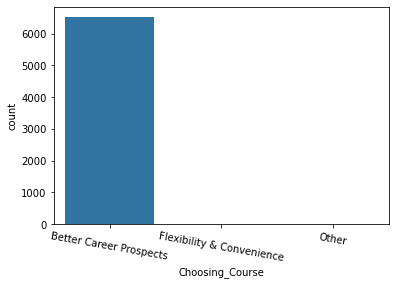

In [14]:
sns.countplot(df["Choosing_Course"])
plt.xticks(rotation=350)
plt.show()

In [15]:
#List of numeric values in the dataset
num_var = ["Newspaper","Do Not Email","Do Not Call","Digital Advertisement","Through Recommendations","Search",
           "Newspaper Article","X Education Forums","Free_Copy"]
def binary_var(x):
    return x.map({"Yes":1,"No":0})
df[num_var] = df[num_var].apply(binary_var)


Here we convert the numerical data to Catgorical data to impliment dummy variables because pd.get_dummies requires categorical values to impute

## 3) Cleaning data

### Handling Missing Values

In [17]:
df.isnull().sum()

Prospect ID                              0
Lead Number                              0
Lead Origin                              0
Lead Source                             36
Do Not Email                             0
Do Not Call                              0
Converted                                0
TotalVisits                            137
Time_Spent                               0
Page Views Per Visit                   137
Last Activity                          103
How did you hear about X Education    2207
Occupation                            2690
Choosing_Course                       2709
Search                                   0
Newspaper Article                        0
X Education Forums                       0
Newspaper                                0
Digital Advertisement                    0
Through Recommendations                  0
Tags                                  3353
Lead Quality                          4767
Lead Profile                          2709
City       

### Removing the numeric missing values and imputing the categorical missing values

In [18]:
# To find the missing values in percentages
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                            0.00
Lead Number                            0.00
Lead Origin                            0.00
Lead Source                            0.39
Do Not Email                           0.00
Do Not Call                            0.00
Converted                              0.00
TotalVisits                            1.48
Time_Spent                             0.00
Page Views Per Visit                   1.48
Last Activity                          1.11
How did you hear about X Education    23.89
Occupation                            29.11
Choosing_Course                       29.32
Search                                 0.00
Newspaper Article                      0.00
X Education Forums                     0.00
Newspaper                              0.00
Digital Advertisement                  0.00
Through Recommendations                0.00
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                    

In [19]:
#Dropping all the Asymmetrique columns and other columns which are having 30% of  missing values and not fitting the data
#As we can see the Choosing_Course column is biased with one column, we can remove that variable

df.drop(["Lead Profile","Prospect ID","Lead Quality","Tags","How did you hear about X Education",
         "Asymmetrique Activity Index",
         "Asymmetrique Profile Index","Asymmetrique Activity Score", 
         "Asymmetrique Profile Score","Choosing_Course"], axis=1,inplace = True)
df.shape

(9240, 20)

In [20]:
# Deleting the nan values rows in data
df = df[~np.isnan(df['Page Views Per Visit'])]

In [21]:
# Values remaining after removing all the columns
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                 0.00
Lead Origin                 0.00
Lead Source                 0.32
Do Not Email                0.00
Do Not Call                 0.00
Converted                   0.00
TotalVisits                 0.00
Time_Spent                  0.00
Page Views Per Visit        0.00
Last Activity               0.00
Occupation                 29.47
Search                      0.00
Newspaper Article           0.00
X Education Forums          0.00
Newspaper                   0.00
Digital Advertisement       0.00
Through Recommendations     0.00
City                       15.59
Free_Copy                   0.00
Last Notable Activity       0.00
dtype: float64

In [26]:
# Imputing the categorical values

In [27]:
# Imputing Occupation data
df_impute = df[["Occupation"]].replace(0, np.nan)
df_impute.head(10)

,Occupation
0,Unemployed
1,Unemployed
2,Student
3,Unemployed
4,Unemployed
5,NaN
6,Unemployed
7,NaN
8,NaN
9,NaN


- Here we can see the values are having null values

In [28]:
mode_val = df["Occupation"].mode()[0]
print(mode_val)

Unemployed


In [29]:
#df["Occupation_Imputed"] = df["Occupation"] 
df["Occupation"]=df_impute["Occupation"].fillna(mode_val)

In [30]:
# Imputig City data
# The City column has Select values which indicated null values
# We have replaced the Select value with the mode value i.e. Mumbai

df_select = df[["City"]].replace("Select", np.nan)
df_select.head()
mode_val2 =  df["City"].mode()[0]
print(mode_val2)
df["City"]=df_select.fillna(mode_val2)
df.head()

Mumbai


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_Spent,Page Views Per Visit,Last Activity,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free_Copy,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified


In [31]:
# Imputing Lead Source data
mode_val3 = df["Lead Source"].mode()[0]
print(mode_val3)
df["Lead Source"]=df["Lead Source"].fillna(mode_val3)
df.head(10)

Google


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Time_Spent,Page Views Per Visit,Last Activity,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,Free_Copy,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
5,660680,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
6,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
7,660664,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,Unemployed,0,0,0,0,0,0,Thane & Outskirts,1,Email Opened
9,660616,API,Google,0,0,0,4.0,58,4.0,Email Opened,Unemployed,0,0,0,0,0,0,Mumbai,0,Email Opened


In [32]:
#Checking the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Number                0.0
Lead Origin                0.0
Lead Source                0.0
Do Not Email               0.0
Do Not Call                0.0
Converted                  0.0
TotalVisits                0.0
Time_Spent                 0.0
Page Views Per Visit       0.0
Last Activity              0.0
Occupation                 0.0
Search                     0.0
Newspaper Article          0.0
X Education Forums         0.0
Newspaper                  0.0
Digital Advertisement      0.0
Through Recommendations    0.0
City                       0.0
Free_Copy                  0.0
Last Notable Activity      0.0
dtype: float64

Finally all the mssing values are been handled as we can see there are no missing values

### Handling Outliers

Text(0.5, 1.0, 'Page Views Per Visit')

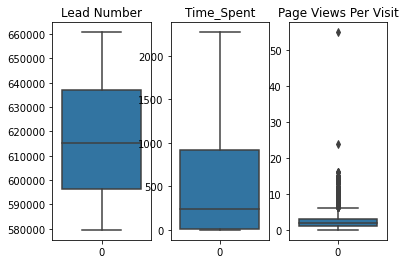

In [33]:
plt.subplot(1,3,1)
sns.boxplot(data=df["Lead Number"])
plt.title("Lead Number")
plt.subplot(1,3,2)
sns.boxplot(data=df["Time_Spent"])
plt.title("Time_Spent")
plt.subplot(1,3,3)
sns.boxplot(data=df["Page Views Per Visit"])
plt.title("Page Views Per Visit")

We can observe tha there are no much Outliers to handle for  the 3 numeric variables we have in the dataset

## 4) Dummy Variables

In [34]:
dumm = pd.get_dummies(df[["Lead Source","Lead Origin","Last Activity",
                          "Occupation","City","Last Notable Activity" ]], drop_first=True)
df = pd.concat([df,dumm],axis=1)

In [35]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits', 'Time_Spent',
       'Page Views Per Visit', 'Last Activity', 'Occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City', 'Free_Copy',
       'Last Notable Activity', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Lead Origin_Landing Page Submis

In [36]:
#Dropping the original columns
df = df.drop(["Lead Source","Lead Origin","Last Activity","Occupation","City","Last Notable Activity"],1)

In [37]:
df.shape

(9103, 78)

### Spliting X and y

In [38]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Time_Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
# Putting feature variable to Y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## 5) Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Scaling of features

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
X_train[["Lead Number", "Time_Spent", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["Lead Number", "Time_Spent", "Page Views Per Visit"]])

X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Time_Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-1.219864,0,0,3.0,1.476324,-0.394072,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,-0.411928,0,0,7.0,-0.771066,2.111481,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,1.012273,0,0,5.0,-0.571257,0.061483,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,1.153819,0,0,14.0,1.393834,0.517039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,-1.592482,0,0,0.0,-0.881052,-1.077404,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Converted = round((sum(df['Converted'])/len(df['Converted'].index))*100,2)
Converted

38.02

We are having 38.02% of the converted rate

## 6) Checking the correlation

In [44]:
## Checking the correlation matrix
plt.figure(figsize=(80,50))
sns.heatmap(X_train.corr(),annot = True,linewidths=1, linecolor='black',cmap='YlOrRd')
plt.show()

## 7) Model Building

In [48]:
import statsmodels.api as sm

In [49]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2586.0
Date:                Wed, 14 Jul 2021   Deviance:                       5172.1
Time:                        13:13:17   Pearson chi2:                 6.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 20.8405   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Number                                            0.2186      0.038      5.785      0.000       0.145       0.293
Do Not Email                                          -1.3751      0.218     -6.306      0.000      -1.803      -0.948
Do Not Call                                           23.1069   5.35e+04      0.000      1.000   -1.05e+05    1.05e+05
TotalVisits                                            0.0520      0.011      4.800      0.000       0.031       0.073
Time_Spent                                             1.1064      0.041     27.216      0.000       1.027       1.186
Page Views Per Visit                                  -0.1664      0.054     -3.065      0.002      -0.273      -0.060
Search                                                 0.1248      0.796      0.157      0.875      -1.435       1.684
Newspaper Article                                    -11.9765   3.97e+04     -0.000      1.000   -7.79e+04    7.79e+04
X Education Forums                                   -11.9765   3.97e+04     -0.000      1.000   -7.79e+04    7.79e+04
Newspaper                                            -25.1146   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                 -0.1511      1.259     -0.120      0.904      -2.618       2.316
Through Recommendations                                0.9303      1.450      0.642      0.521      -1.912       3.772
Free_Copy                                              0.0325      0.106      0.305      0.760      -0.176       0.241
Lead Source_Direct Traffic                             1.5095      1.649      0.915      0.360      -1.723       4.742
Lead Source_Facebook                                   0.9558      2.202      0.434      0.664      -3.359       5.271
Lead Source_Google                                     1.7277      1.645      1.050      0.294      -1.497       4.952
Lead Source_Live Chat                                 21.4014   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                    25.7698   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                 2.6490      1.651      1.604      0.109      -0.588       5.885
Lead Source_Organic Search                             1.5967      1.650      0.968      0.333      -1.637       4.830
Lead Source_Pay per Click Ads                        -20.2794   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                          -3.336e-09   8.01e-06     -0.000      1.000   -1.57e-05  

## Feature Selection Using RFE


In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 29),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 54),
 ('Time_Spent', True, 1),
 ('Page Views Per Visit', False, 49),
 ('Search', False, 55),
 ('Newspaper Article', False, 39),
 ('X Education Forums', False, 38),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 16),
 ('Through Recommendations', False, 21),
 ('Free_Copy', False, 48),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 52),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 47),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Time_Spent', 'Newspaper', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Occupation_Housewife',
       'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [54]:
 X_train.columns[~rfe.support_]

Index(['Lead Number', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums',
       'Digital Advertisement', 'Through Recommendations', 'Free_Copy',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Lead Origin_Landing Page Submission',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last 

### Model building using stast model

### Model building 1

In [55]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.5
Date:                Wed, 14 Jul 2021   Deviance:                       5316.9
Time:                        13:13:30   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5514      0.549     -1.005      0.315      -1.627       0.524
Do Not Email                                      -1.2870      0.190     -6.788      0.000      -1.659      -0.915
Time_Spent                                         1.1185      0.040     28.023      0.000       1.040       1.197
Newspaper                                        -23.9256   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Olark Chat                             1.1212      0.103     10.850      0.000       0.919       1.324
Lead Source_Welingak Website                       1.9760      0.757      2.611      0.009       0.493       3.459
Lead Source_google                               -21.8529   2.57e+04     -0.001      0.999   -5.04e+04    5.04e+04
Lead Origin_Lead Add Form                          3.9623      0.223     17.739      0.000       3.525       4.400
Lead Origin_Lead Import                            1.4418      0.446      3.235      0.001       0.568       2.315
Last Activity_Converted to Lead                   -1.3191      0.210     -6.289      0.000      -1.730      -0.908
Last Activity_Email Bounced                       -0.8384      0.359     -2.334      0.020      -1.542      -0.134
Last Activity_Had a Phone Conversation             0.8712      0.851      1.024      0.306      -0.796       2.538
Last Activity_Olark Chat Conversation             -1.4509      0.160     -9.069      0.000      -1.764      -1.137
Last Activity_Resubscribed to emails              23.8007   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Occupation_Housewife                              22.4256    1.6e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Student                                -0.3643      0.596     -0.611      0.541      -1.533       0.805
Occupation_Unemployed                             -0.8189      0.550     -1.490      0.136      -1.896       0.258
Occupation_Working Professional                    2.0102      0.579      3.475      0.001       0.876       3.144
Last Notable Activity_Had a Phone Conversation     2.0913      1.409      1.485      0.138      -0.670       4.852
Last Notable Activity_SMS Sent                     1.4975      0.080     18.725      0.000       1.341       1.654
Last Notable Activity_Unreachable                  1.7606      0.509      3.456      0.001       0.762       2.759
==================================================================================================================
"""

In [56]:
# Checking forthe VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Occupation_Unemployed,2.05
10,Last Activity_Had a Phone Conversation,2.01
17,Last Notable Activity_Had a Phone Conversation,2.00
0,Do Not Email,1.80
3,Lead Source_Olark Chat,1.79
9,Last Activity_Email Bounced,1.73
6,Lead Origin_Lead Add Form,1.57
18,Last Notable Activity_SMS Sent,1.48
11,Last Activity_Olark Chat Conversation,1.43
4,Lead Source_Welingak Website,1.32


In [57]:
# Removing the values having high P values
col = col.drop(["Newspaper"],1)

### Model building 2

In [58]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.0
Date:                Wed, 14 Jul 2021   Deviance:                       5320.1
Time:                        13:13:30   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5503      0.548     -1.003      0.316      -1.625       0.525
Do Not Email                                      -1.2859      0.190     -6.784      0.000      -1.657      -0.914
Time_Spent                                         1.1160      0.040     27.995      0.000       1.038       1.194
Lead Source_Olark Chat                             1.1194      0.103     10.835      0.000       0.917       1.322
Lead Source_Welingak Website                       1.9757      0.757      2.611      0.009       0.492       3.459
Lead Source_google                               -21.8505   2.57e+04     -0.001      0.999   -5.04e+04    5.04e+04
Lead Origin_Lead Add Form                          3.9606      0.223     17.732      0.000       3.523       4.398
Lead Origin_Lead Import                            1.4402      0.446      3.232      0.001       0.567       2.314
Last Activity_Converted to Lead                   -1.3166      0.210     -6.279      0.000      -1.728      -0.906
Last Activity_Email Bounced                       -0.8371      0.359     -2.331      0.020      -1.541      -0.133
Last Activity_Had a Phone Conversation             0.8725      0.850      1.026      0.305      -0.794       2.539
Last Activity_Olark Chat Conversation             -1.4495      0.160     -9.062      0.000      -1.763      -1.136
Last Activity_Resubscribed to emails              23.8009   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Occupation_Housewife                              22.4245   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Student                                -0.3654      0.596     -0.613      0.540      -1.534       0.803
Occupation_Unemployed                             -0.8207      0.549     -1.494      0.135      -1.897       0.256
Occupation_Working Professional                    2.0086      0.578      3.473      0.001       0.875       3.142
Last Notable Activity_Had a Phone Conversation     2.0907      1.408      1.485      0.138      -0.670       4.851
Last Notable Activity_SMS Sent                     1.4984      0.080     18.744      0.000       1.342       1.655
Last Notable Activity_Unreachable                  1.7612      0.509      3.458      0.001       0.763       2.759
==================================================================================================================
"""

In [60]:
# Removing the values having high P values
col = col.drop(["Last Activity_Resubscribed to emails"],1)

## Model 3

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.5
Date:                Wed, 14 Jul 2021   Deviance:                       5323.1
Time:                        13:13:31   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.5503      0.548     -1.004      0.316      -1.625       0.525
Do Not Email                                      -1.2861      0.190     -6.786      0.000      -1.658      -0.915
Time_Spent                                         1.1159      0.040     27.992      0.000       1.038       1.194
Lead Source_Olark Chat                             1.1244      0.103     10.892      0.000       0.922       1.327
Lead Source_Welingak Website                       1.9759      0.757      2.611      0.009       0.493       3.459
Lead Source_google                               -21.8510   2.57e+04     -0.001      0.999   -5.04e+04    5.04e+04
Lead Origin_Lead Add Form                          3.9602      0.223     17.731      0.000       3.522       4.398
Lead Origin_Lead Import                            1.4394      0.446      3.230      0.001       0.566       2.313
Last Activity_Converted to Lead                   -1.3171      0.210     -6.282      0.000      -1.728      -0.906
Last Activity_Email Bounced                       -0.8383      0.359     -2.335      0.020      -1.542      -0.135
Last Activity_Had a Phone Conversation             0.8719      0.850      1.026      0.305      -0.794       2.538
Last Activity_Olark Chat Conversation             -1.4534      0.160     -9.089      0.000      -1.767      -1.140
Occupation_Housewife                              22.4245   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
Occupation_Student                                -0.3660      0.596     -0.614      0.539      -1.534       0.802
Occupation_Unemployed                             -0.8200      0.549     -1.493      0.136      -1.897       0.257
Occupation_Working Professional                    2.0087      0.578      3.474      0.001       0.875       3.142
Last Notable Activity_Had a Phone Conversation     2.0906      1.408      1.484      0.138      -0.670       4.851
Last Notable Activity_SMS Sent                     1.4970      0.080     18.729      0.000       1.340       1.654
Last Notable Activity_Unreachable                  1.7599      0.509      3.456      0.001       0.762       2.758
==================================================================================================================
"""

In [63]:
# Removing the values having high P values
col = col.drop(["Occupation_Housewife"],1)

## Model 4

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.9
Date:                Wed, 14 Jul 2021   Deviance:                       5329.8
Time:                        13:13:32   Pearson chi2:                 6.49e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0492      0.477      0.103      0.918      -0.887       0.985
Do Not Email                                      -1.2906      0.190     -6.801      0.000      -1.663      -0.919
Time_Spent                                         1.1149      0.040     27.987      0.000       1.037       1.193
Lead Source_Olark Chat                             1.1221      0.103     10.873      0.000       0.920       1.324
Lead Source_Welingak Website                       1.9761      0.757      2.611      0.009       0.493       3.459
Lead Source_google                               -20.8513   1.56e+04     -0.001      0.999   -3.06e+04    3.06e+04
Lead Origin_Lead Add Form                          3.9592      0.223     17.730      0.000       3.521       4.397
Lead Origin_Lead Import                            1.4374      0.446      3.226      0.001       0.564       2.311
Last Activity_Converted to Lead                   -1.3175      0.210     -6.285      0.000      -1.728      -0.907
Last Activity_Email Bounced                       -0.8345      0.359     -2.324      0.020      -1.538      -0.131
Last Activity_Had a Phone Conversation             0.8713      0.850      1.025      0.305      -0.795       2.537
Last Activity_Olark Chat Conversation             -1.4582      0.160     -9.114      0.000      -1.772      -1.145
Occupation_Student                                -0.9641      0.532     -1.813      0.070      -2.007       0.078
Occupation_Unemployed                             -1.4182      0.479     -2.962      0.003      -2.357      -0.480
Occupation_Working Professional                    1.4101      0.512      2.756      0.006       0.407       2.413
Last Notable Activity_Had a Phone Conversation     2.0901      1.408      1.484      0.138      -0.670       4.850
Last Notable Activity_SMS Sent                     1.4965      0.080     18.727      0.000       1.340       1.653
Last Notable Activity_Unreachable                  1.7589      0.509      3.454      0.001       0.761       2.757
==================================================================================================================
"""

In [66]:
# Removing the values having high P values
col = col.drop(["Lead Source_google"],1)

## Model 5

In [67]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.2
Date:                Wed, 14 Jul 2021   Deviance:                       5332.4
Time:                        13:13:32   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0491      0.477      0.103      0.918      -0.887       0.985
Do Not Email                                      -1.2896      0.190     -6.795      0.000      -1.662      -0.918
Time_Spent                                         1.1143      0.040     27.982      0.000       1.036       1.192
Lead Source_Olark Chat                             1.1230      0.103     10.880      0.000       0.921       1.325
Lead Source_Welingak Website                       1.9758      0.757      2.611      0.009       0.493       3.459
Lead Origin_Lead Add Form                          3.9602      0.223     17.734      0.000       3.523       4.398
Lead Origin_Lead Import                            1.4389      0.446      3.229      0.001       0.565       2.312
Last Activity_Converted to Lead                   -1.3151      0.210     -6.274      0.000      -1.726      -0.904
Last Activity_Email Bounced                       -0.8333      0.359     -2.321      0.020      -1.537      -0.129
Last Activity_Had a Phone Conversation             0.8733      0.850      1.027      0.304      -0.793       2.539
Last Activity_Olark Chat Conversation             -1.4569      0.160     -9.106      0.000      -1.770      -1.143
Occupation_Student                                -0.9648      0.532     -1.814      0.070      -2.007       0.077
Occupation_Unemployed                             -1.4202      0.479     -2.966      0.003      -2.359      -0.482
Occupation_Working Professional                    1.4093      0.512      2.755      0.006       0.407       2.412
Last Notable Activity_Had a Phone Conversation     2.0901      1.408      1.484      0.138      -0.670       4.850
Last Notable Activity_SMS Sent                     1.4983      0.080     18.751      0.000       1.342       1.655
Last Notable Activity_Unreachable                  1.7607      0.509      3.458      0.001       0.763       2.759
==================================================================================================================
"""

In [69]:
# Removing the values having high P values
col = col.drop(["Last Activity_Had a Phone Conversation"],1)

## Model 6

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.7
Date:                Wed, 14 Jul 2021   Deviance:                       5333.4
Time:                        13:13:32   Pearson chi2:                 6.49e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              0.0493      0.477      0.103      0.918      -0.886       0.985
Do Not Email                                      -1.2893      0.190     -6.791      0.000      -1.661      -0.917
Time_Spent                                         1.1143      0.040     27.988      0.000       1.036       1.192
Lead Source_Olark Chat                             1.1213      0.103     10.868      0.000       0.919       1.324
Lead Source_Welingak Website                       1.9719      0.757      2.606      0.009       0.489       3.455
Lead Origin_Lead Add Form                          3.9623      0.223     17.745      0.000       3.525       4.400
Lead Origin_Lead Import                            1.4365      0.446      3.223      0.001       0.563       2.310
Last Activity_Converted to Lead                   -1.3177      0.210     -6.287      0.000      -1.729      -0.907
Last Activity_Email Bounced                       -0.8358      0.359     -2.327      0.020      -1.540      -0.132
Last Activity_Olark Chat Conversation             -1.4583      0.160     -9.116      0.000      -1.772      -1.145
Occupation_Student                                -0.9642      0.532     -1.813      0.070      -2.006       0.078
Occupation_Unemployed                             -1.4179      0.479     -2.961      0.003      -2.356      -0.479
Occupation_Working Professional                    1.4122      0.512      2.760      0.006       0.409       2.415
Last Notable Activity_Had a Phone Conversation     2.9610      1.125      2.633      0.008       0.757       5.165
Last Notable Activity_SMS Sent                     1.4960      0.080     18.731      0.000       1.340       1.653
Last Notable Activity_Unreachable                  1.7584      0.509      3.453      0.001       0.760       2.756
==================================================================================================================
"""

In [72]:
# Removing the values having high P values
col = col.drop(["Occupation_Student"],1)

## Model 7

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2668.4
Date:                Wed, 14 Jul 2021   Deviance:                       5336.8
Time:                        13:13:33   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.7231      0.209     -3.456      0.001      -1.133      -0.313
Do Not Email                                      -1.2875      0.190     -6.794      0.000      -1.659      -0.916
Time_Spent                                         1.1155      0.040     28.026      0.000       1.037       1.194
Lead Source_Olark Chat                             1.1173      0.103     10.837      0.000       0.915       1.319
Lead Source_Welingak Website                       1.9740      0.757      2.608      0.009       0.491       3.457
Lead Origin_Lead Add Form                          3.9601      0.223     17.739      0.000       3.523       4.398
Lead Origin_Lead Import                            1.4357      0.446      3.222      0.001       0.562       2.309
Last Activity_Converted to Lead                   -1.3240      0.209     -6.320      0.000      -1.735      -0.913
Last Activity_Email Bounced                       -0.8461      0.359     -2.358      0.018      -1.549      -0.143
Last Activity_Olark Chat Conversation             -1.4594      0.160     -9.125      0.000      -1.773      -1.146
Occupation_Unemployed                             -0.6436      0.210     -3.062      0.002      -1.056      -0.232
Occupation_Working Professional                    2.1867      0.277      7.899      0.000       1.644       2.729
Last Notable Activity_Had a Phone Conversation     2.9591      1.125      2.631      0.009       0.755       5.164
Last Notable Activity_SMS Sent                     1.4927      0.080     18.687      0.000       1.336       1.649
Last Notable Activity_Unreachable                  1.7572      0.509      3.451      0.001       0.759       2.755
==================================================================================================================
"""

In [74]:
# Checking forthe VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Occupation_Unemployed,2.02
0,Do Not Email,1.80
2,Lead Source_Olark Chat,1.77
7,Last Activity_Email Bounced,1.73
4,Lead Origin_Lead Add Form,1.56
12,Last Notable Activity_SMS Sent,1.47
8,Last Activity_Olark Chat Conversation,1.42
3,Lead Source_Welingak Website,1.32
1,Time_Spent,1.30
10,Occupation_Working Professional,1.21


In [75]:
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

7962    0.854801
5520    0.097361
1962    0.118783
1566    0.953399
9170    0.225781
dtype: float64

In [76]:
# We are converting the above y_train_pred to an array using reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.85480104, 0.09736135, 0.11878279, 0.95339936, 0.22578142,
       0.22578142, 0.48362362, 0.14042137, 0.56473982, 0.46934508])

In [77]:
# Creating a new dataframe for the prediction purpose
y_train_pred_final = pd.DataFrame({"Converted":y_train.values,"Converted_Prob":y_train_pred})
y_train_pred_final["ID"] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.854801,7962
1,0,0.097361,5520
2,0,0.118783,1962
3,1,0.953399,1566
4,0,0.225781,9170


In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0) # Assuming the cutoff

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.854801,7962,1
1,0,0.097361,5520,0
2,0,0.118783,1962,0
3,1,0.953399,1566,1
4,0,0.225781,9170,0


In [79]:
# Checking for conversion metrics and accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3507  446]
 [ 739 1680]]


In [80]:
# Accuracy
Accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
round(Accuracy*100,2)

81.4

## 8) Model Evaluation

### Calculating Sensitivity, Specificity

In [81]:
# Here the cutoff is assumed to be 0.5
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN),2)
Sensitivity

0.69

In [83]:
# Specificity
Specificity = round(TN / float(TN+FP),2)
Specificity

0.89

In [84]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7902163687676388


In [85]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8259538389072067


## ROC Curve

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'y--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob,drop_intermediate=False)

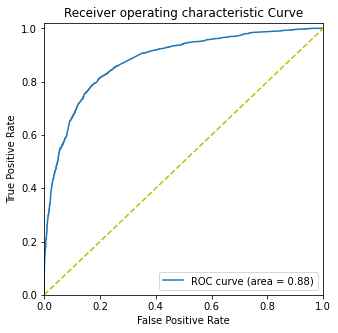

In [88]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Find Optimal Cutoff Point

In [89]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.854801,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.097361,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.118783,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.953399,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.225781,9170,0,1,1,1,0,0,0,0,0,0,0


In [90]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.580822  0.966928  0.344548
0.2   0.2  0.736347  0.911947  0.628889
0.3   0.3  0.795825  0.832575  0.773337
0.4   0.4  0.814030  0.767673  0.842398
0.5   0.5  0.814030  0.694502  0.887174
0.6   0.6  0.795982  0.581645  0.927144
0.7   0.7  0.781073  0.503927  0.950670
0.8   0.8  0.761770  0.420422  0.970655
0.9   0.9  0.713748  0.263745  0.989122


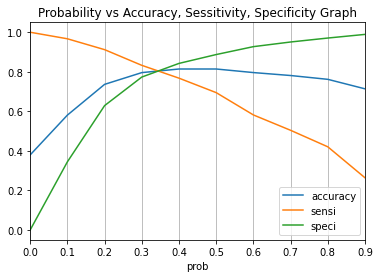

In [91]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci']).grid(axis='x')
plt.xlim(0, 0.9)
plt.title("Probability vs Accuracy, Sessitivity, Specificity Graph")
plt.show()

In [92]:
# Let us make the final prediction using 0.35 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.854801,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.097361,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.118783,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.953399,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.225781,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [93]:
y_train_pred_final.predicted

0       1
1       0
2       0
3       1
4       0
       ..
6367    0
6368    1
6369    1
6370    1
6371    0
Name: predicted, Length: 6372, dtype: int64

In [94]:
# Now let us calculate the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.854801,7962,1,1,1,1,1,1,1,1,1,1,0,1,85
1,0,0.097361,5520,0,1,0,0,0,0,0,0,0,0,0,0,10
2,0,0.118783,1962,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.953399,1566,1,1,1,1,1,1,1,1,1,1,1,1,95
4,0,0.225781,9170,0,1,1,1,0,0,0,0,0,0,0,0,23
5,0,0.225781,5097,0,1,1,1,0,0,0,0,0,0,0,0,23
6,0,0.483624,8954,0,1,1,1,1,1,0,0,0,0,0,1,48
7,1,0.140421,309,0,1,1,0,0,0,0,0,0,0,0,0,14
8,1,0.564740,5519,1,1,1,1,1,1,1,0,0,0,0,1,56
9,1,0.469345,1050,0,1,1,1,1,1,0,0,0,0,0,1,47


In [95]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1944
0     475
Name: final_predicted, dtype: int64

In [96]:
# check the precentage of final_predicted conversions

round(1944/float(1944+475),3)

0.804

## Calculating all the evaluation metrices with final_predicted column

### Accuracy

In [97]:
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.81

### Confusion Matrix

In [98]:
conf_mat2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
conf_mat2

array([[3196,  757],
       [ 475, 1944]], dtype=int64)

In [99]:

TP = conf_mat2[1,1] # true positive 
TN = conf_mat2[0,0] # true negatives
FP = conf_mat2[0,1] # false positives
FN = conf_mat2[1,0] # false negatives

### Sensitivity

In [100]:
round(TP/float(TP+FN),3)

0.804

### Specificity

In [101]:
round(TN/float(TN+FP),2)

0.81

### False Postive Rate

In [102]:
print(FP/ float(TN+FP))

0.191500126486213


### Positive predictive value / Precision

In [103]:
print(TP / float(TP+FP))
# OR
# from sklearn.metrics import precision_score, recall_score
# precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7197334320621992


### Negative predictive value

In [104]:
print(TN / float(TN+ FN))

0.8706074639062925


In [105]:
from sklearn.metrics import precision_score, recall_score
Precision = round(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),3)
Precision

0.72

In [106]:
Recall = round(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),3)
Recall

0.804

#### &-----------------------------------------------------------------------------------------&-------------------------------------------------------------------------------------------------------&

### Precision and recall tradeoff

In [108]:
from sklearn.metrics import precision_recall_curve

In [109]:
y_train_pred_final.Converted.head(), y_train_pred_final.final_predicted.head()

(0    0
 1    0
 2    0
 3    1
 4    0
 Name: Converted, dtype: int64,
 0    1
 1    0
 2    0
 3    1
 4    0
 Name: final_predicted, dtype: int64)

In [110]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

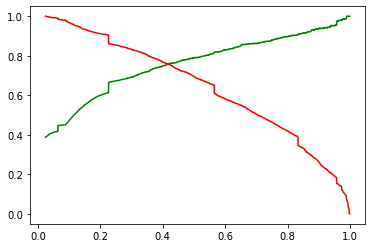

In [111]:
#plt.style.use('dark_background')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 9) Prediction Analysis

In [112]:
#Fitting the test data

In [113]:
X_test[["Lead Number","Time_Spent",
        "Page Views Per Visit"]] = scaler.transform(X_test[["Lead Number","Time_Spent","Page Views Per Visit"]])
X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Time_Spent,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,0.422362,0,0,3.0,-0.103815,0.289261,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,0.175528,0,0,0.0,-0.881052,-1.077404,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,-0.988748,1,0,2.0,0.424120,-0.166294,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1196,1.298896,0,0,4.0,-0.105648,0.744816,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,-1.290830,0,0,7.0,-0.428274,-0.280183,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Time_Spent,Lead Source_Olark Chat,Lead Source_Welingak Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Occupation_Unemployed,Occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3504,0,-0.103815,0,0,0,0,0,0,0,1,0,0,0,0
4050,0,-0.881052,0,0,1,0,0,0,0,1,0,0,1,0
7201,1,0.424120,0,0,0,0,0,0,0,1,0,0,1,0
1196,0,-0.105648,0,0,0,0,0,0,0,1,0,0,0,0
8219,0,-0.428274,0,0,0,0,0,0,0,1,0,0,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)

In [116]:
# Predictions on Test dataset
y_test_pred = res.predict(X_test_sm)

In [117]:
y_test_pred.head()

3504    0.185038
4050    0.957026
7201    0.334381
1196    0.184730
8219    0.136519
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.185038
4050,0.957026
7201,0.334381
1196,0.184730
8219,0.136519


In [119]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [120]:
# Putting LeadId to index

y_test_df['Id'] = y_test_df.index

In [121]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()

,Converted,Id,0
0,0,3504,0.185038
1,1,4050,0.957026
2,0,7201,0.334381
3,0,1196,0.184730
4,1,8219,0.136519


In [124]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [125]:
# Rearranging the columns
y_pred_final = pd.DataFrame({"Converted":y_test.values,"Converted_Prob":y_test_pred})
y_pred_final["ID"] = y_test.index
y_pred_final.head()

,Converted,Converted_Prob,ID
3504,0,0.185038,3504
4050,1,0.957026,4050
7201,0,0.334381,7201
1196,0,0.184730,1196
8219,1,0.136519,8219


In [126]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.35%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['final_predicted'] 

3504    0
4050    1
7201    0
1196    0
8219    0
       ..
6508    0
315     0
3766    0
8043    1
5826    1
Name: final_predicted, Length: 2731, dtype: int64

In [127]:
y_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted
3504,0,0.185038,3504,0
4050,1,0.957026,4050,1
7201,0,0.334381,7201,0
1196,0,0.184730,1196,0
8219,1,0.136519,8219,0


In [128]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_Prob,ID,final_predicted,lead_score
3504,0,0.185038,3504,0,19
4050,1,0.957026,4050,1,96
7201,0,0.334381,7201,0,33
1196,0,0.184730,1196,0,18
8219,1,0.136519,8219,0,14


In [129]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    849
0    193
Name: final_predicted, dtype: int64

In [130]:
# Precentage of final_predicted conversions on test data
847/float(847+195)

0.8128598848368522

### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set


In [131]:
#Accuracy for test data

Accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
Accuracy_test

0.8088612229952399

In [132]:
conf_test2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
conf_test2

array([[1360,  329],
       [ 193,  849]], dtype=int64)

In [133]:
TP = conf_test2[1,1] # true positive 
TN = conf_test2[0,0] # true negatives
FP = conf_test2[0,1] # false positives
FN = conf_test2[1,0] # false negatives

In [134]:
# Sensitivity for test data
Sensitivity_test = round(TP / float(TP+FN),3)
Sensitivity_test

0.815

In [135]:
# Specificity for test data
Specificity_test = round(TN / float(TN+FP),2)
Specificity_test

0.81

### Precision and Recall 

In [136]:
# Precision for test data
Precision_test = round(precision_score(y_pred_final.Converted, y_pred_final.final_predicted),3)
Precision_test

0.721

In [137]:
# Recall for test data
Recall_test = round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),3)
Recall_test

0.815

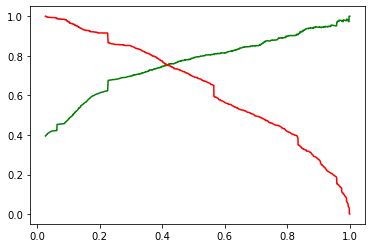

In [138]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
# plt.style.use('dark_background')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 10) Conclusion:

- We considered optimal cutoff of the model to be 0.35 according to the cutoff we  got from Probability vs Accuracy, Sessitivity, Specificity Graph
- The top 3 variables for this case study are Lead Origin_Lead Add Form, Last Notable Activity_Had a Phone Conversation and Occupation_Working Professional	 	
- The evaluation metrices for Train and Test dataset are as follows -

In [139]:
print("The evaluation metrices for Train dataset are Accuracy => {acc}, Sessitivity => {sensi}, Specificity => {speci}"
      .format(acc=round(Accuracy,2),sensi=Sensitivity,speci = Specificity))
print("The evaluation metrices for Test dataset are Accuracy => {acc}, Sessitivity => {sensi}, Specificity => {speci}"
      .format(acc=round(Accuracy,2),sensi=Sensitivity_test,speci = Specificity_test))

The evaluation metrices for Train dataset are Accuracy => 0.81, Sessitivity => 0.69, Specificity => 0.89
The evaluation metrices for Test dataset are Accuracy => 0.81, Sessitivity => 0.815, Specificity => 0.81


In [140]:
print("The evaluation metrices for Train dataset are Precision => {pre}, Recall => {rec}"
      .format(pre=Precision,rec=Recall))
print("The evaluation metrices for Test dataset are Precision => {pre}, Recall => {rec}"
      .format(pre=Precision_test,rec=Recall_test))

The evaluation metrices for Train dataset are Precision => 0.72, Recall => 0.804
The evaluation metrices for Test dataset are Precision => 0.721, Recall => 0.815
